In [20]:
import yfinance as yf
from structure.tickers import Ticker

In [22]:
uvxy = Ticker("UVXY")
uvxy.historical_prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-04-18 00:00:00-04:00,37.720001,39.759998,36.980000,38.980000,5566700,0.0,0.0,0.0
2024-04-19 00:00:00-04:00,39.160000,41.419998,38.009998,40.520000,7474700,0.0,0.0,0.0
2024-04-22 00:00:00-04:00,38.119999,38.240002,35.080002,35.770000,6535000,0.0,0.0,0.0
2024-04-23 00:00:00-04:00,34.660000,34.919998,33.410000,33.709999,6477100,0.0,0.0,0.0
2024-04-24 00:00:00-04:00,33.490002,34.610001,33.139999,33.290001,6559400,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-04-11 00:00:00-04:00,43.680000,46.950001,39.930000,40.459999,19161100,0.0,0.0,0.0
2025-04-14 00:00:00-04:00,34.930000,39.090000,33.029999,33.330002,17978900,0.0,0.0,0.0
2025-04-15 00:00:00-04:00,33.369999,34.009998,31.320000,33.009998,13711400,0.0,0.0,0.0


In [12]:
import yfinance as yf
import pandas as pd

# Download historical prices
tickers = ['VXX', 'UVXY', 'SPY']
data = yf.download(tickers, start='2020-01-01', end='2024-12-31')['Close']
returns = data.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


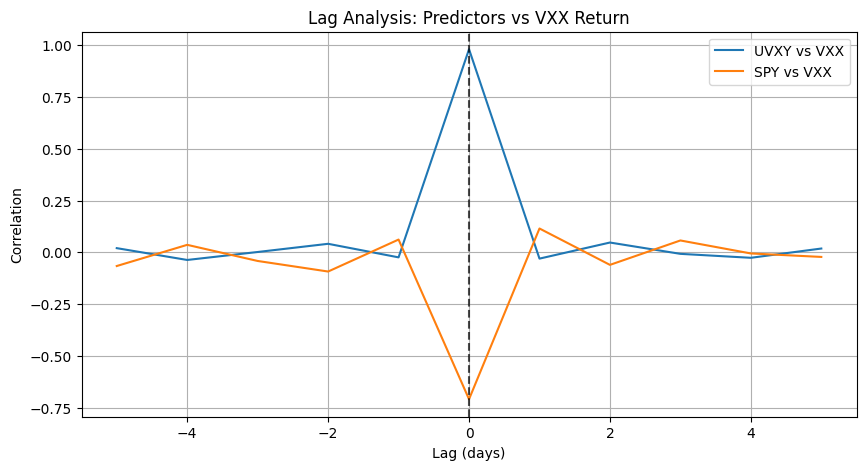

In [13]:
# 📦 Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Step 3: Define lagged correlation function (predictor is shifted, target is fixed)
def lagged_predictor_corr(predictor, target, max_lag=5):
    results = []
    for lag in range(-max_lag, max_lag + 1):
        shifted = predictor.shift(lag)
        corr = shifted.corr(target)
        results.append((lag, corr))
    return pd.DataFrame(results, columns=['Lag', 'Correlation'])

# 📈 Step 4: Run lag analysis
uvxy_corr = lagged_predictor_corr(returns['UVXY'], returns['VXX'])
spy_corr = lagged_predictor_corr(returns['SPY'], returns['VXX'])

# 📉 Step 5: Plot the lag correlation results
plt.figure(figsize=(10, 5))
plt.plot(uvxy_corr['Lag'], uvxy_corr['Correlation'], label='UVXY vs VXX')
plt.plot(spy_corr['Lag'], spy_corr['Correlation'], label='SPY vs VXX')
plt.axvline(0, color='black', linestyle='--', alpha=0.7)
plt.title('Lag Analysis: Predictors vs VXX Return')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


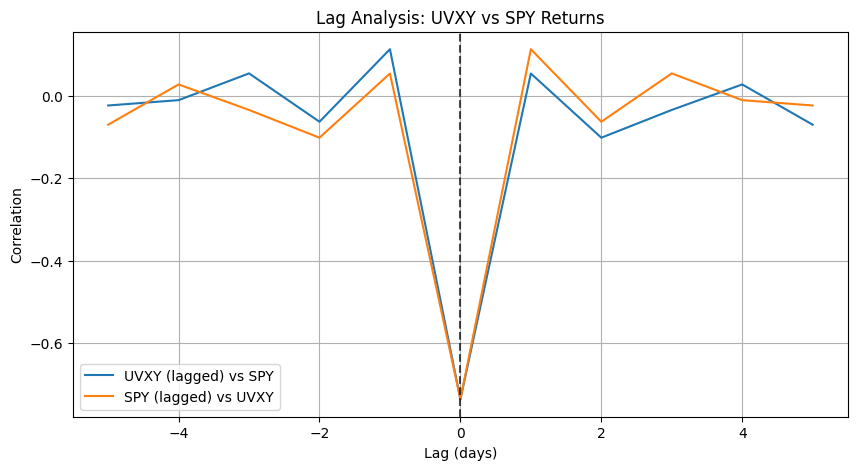

In [14]:
# 📈 Step 4: Run lag analysis
uvxy_vs_spy = lagged_predictor_corr(returns['UVXY'], returns['SPY'])
spy_vs_uvxy = lagged_predictor_corr(returns['SPY'], returns['UVXY'])

# 📉 Step 5: Plot lag correlation in both directions
plt.figure(figsize=(10, 5))
plt.plot(uvxy_vs_spy['Lag'], uvxy_vs_spy['Correlation'], label='UVXY (lagged) vs SPY')
plt.plot(spy_vs_uvxy['Lag'], spy_vs_uvxy['Correlation'], label='SPY (lagged) vs UVXY')
plt.axvline(0, color='black', linestyle='--', alpha=0.7)
plt.title('Lag Analysis: UVXY vs SPY Returns')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/1v/5qnk1lhx6z5dwgy01ll992240000gn/T/ipykernel_53790/1089605473.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


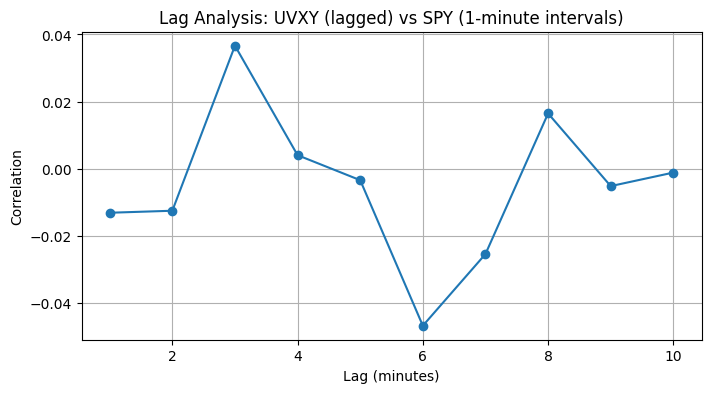

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 📥 Step 1: Download 1-minute interval data (last 7 days)
tickers = ['UVXY', 'SPY']
data = yf.download(tickers, period='7d', interval='1m', progress=False)['Close']

# 📊 Step 2: Compute 1-minute returns
returns = data.pct_change().dropna()

# ✅ Step 3: Define short-term lagged correlation
def minute_lagged_corr(predictor, target, max_lag=10):
    results = []
    for lag in range(1, max_lag + 1):
        corr = predictor.shift(lag).corr(target)
        results.append((lag, corr))
    return pd.DataFrame(results, columns=['Lag (minutes)', 'Correlation'])

# 📈 Step 4: Run lag analysis: does UVXY lead SPY?
uvxy_leads_spy = minute_lagged_corr(returns['UVXY'], returns['SPY'])

# 📉 Step 5: Plot
plt.figure(figsize=(8, 4))
plt.plot(uvxy_leads_spy['Lag (minutes)'], uvxy_leads_spy['Correlation'], marker='o')
plt.title('Lag Analysis: UVXY (lagged) vs SPY (1-minute intervals)')
plt.xlabel('Lag (minutes)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


In [5]:
vxy = Ticker("UVXY")

In [6]:
vxy.historical_prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-04-17 00:00:00-04:00,38.680000,41.070000,37.520000,38.490002,7231000,0.0,0.0,0.0
2024-04-18 00:00:00-04:00,37.720001,39.759998,36.980000,38.980000,5566700,0.0,0.0,0.0
2024-04-19 00:00:00-04:00,39.160000,41.419998,38.009998,40.520000,7474700,0.0,0.0,0.0
2024-04-22 00:00:00-04:00,38.119999,38.240002,35.080002,35.770000,6535000,0.0,0.0,0.0
2024-04-23 00:00:00-04:00,34.660000,34.919998,33.410000,33.709999,6477100,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-04-10 00:00:00-04:00,36.490002,47.480000,34.750000,41.799999,30164900,0.0,0.0,0.0
2025-04-11 00:00:00-04:00,43.680000,46.950001,39.930000,40.459999,19161100,0.0,0.0,0.0
2025-04-14 00:00:00-04:00,34.930000,39.090000,33.029999,33.330002,17978900,0.0,0.0,0.0
